In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages (0.21.0)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from datetime import datetime as dt
#from sklearn.metrics import classifiation_report
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
data=pd.read_csv("/Users/wenze/Wenze's Jupiter World/DevMaster/Predict failure Tower_May_4_2019/1533148882_failures.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [4]:
data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
data.info()
#No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
#Check the percentage of the fail devices. 
device_fail=data['device'][data['failure']==1]
(device_fail.nunique(),data.device.nunique())

(106, 1168)

In [6]:
data.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [31]:
data.failure.value_counts()[1]/data.failure.shape[0]

0.000851446656063746

As we can see there are less than 1% of the records have failure. this means the data is imbalanced. We are facing the imbalanced classification problem.

In [6]:
data.columns[3:]

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')

In [45]:
df_failure=data.groupby('device').mean()
df_failure.reset_index(inplace=True)
df_failure.loc[:,['device','failure']]

,device,failure
0,S1F01085,0.000000
1,S1F013BB,0.000000
2,S1F0166B,0.000000
3,S1F01E6Y,0.000000
4,S1F01JE0,0.000000
5,S1F01R2B,0.000000
6,S1F01TD5,0.000000
7,S1F01XDJ,0.000000
8,S1F023H2,0.052632
9,S1F02A0J,0.000000


In [8]:
data.columns[3:]

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')

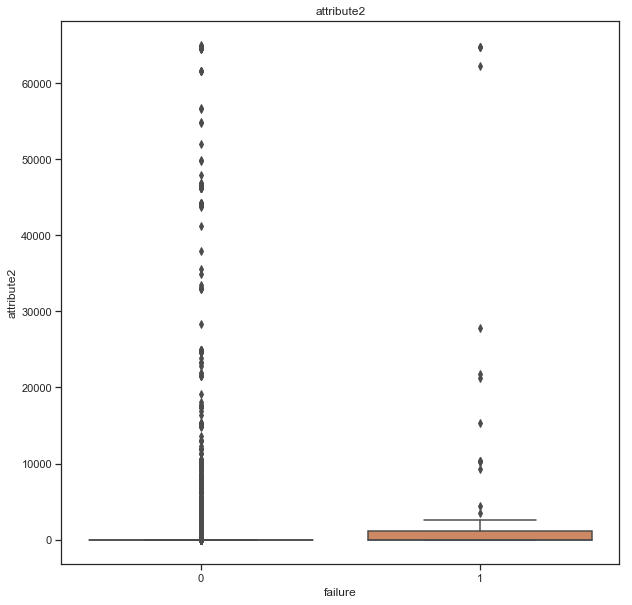

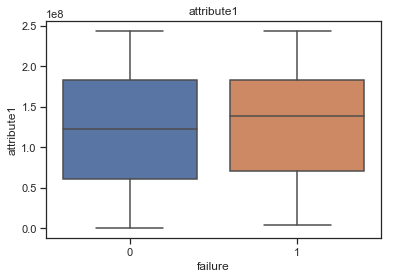

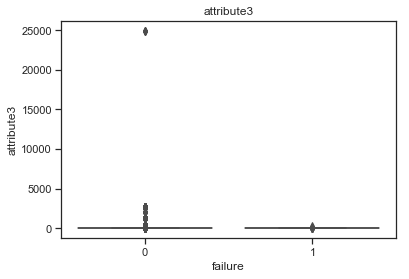

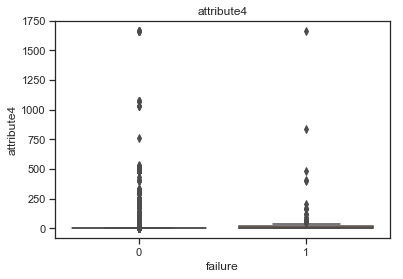

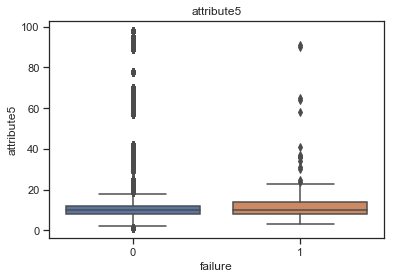

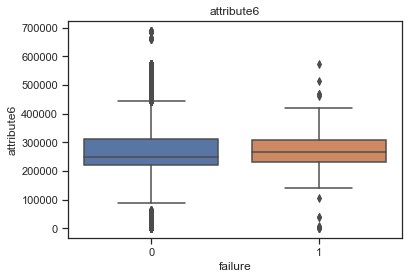

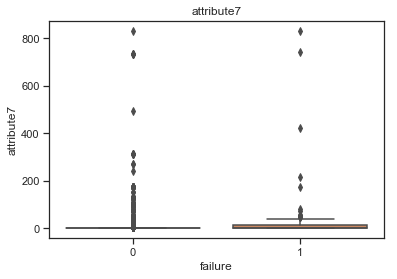

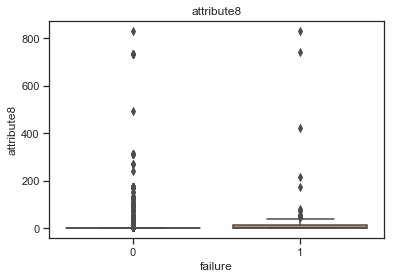

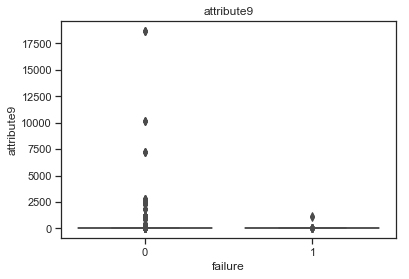

In [9]:
fig=plt.figure(figsize=(10,10))
for i, col in enumerate(data.columns[3:]):
    plt.figure(i)
    sns.boxplot(x=data.failure,y=data[col]).set_title(col);

convert date into the date type then to ordinal format

In [17]:
data['date']=pd.to_datetime(data['date'])
data['date']=data['date'].apply(lambda x: x.toordinal())

In [18]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
numeric_feats=['attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9']
#Check the skews of the numeric features
skewed_feats=data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\n Skew in numeric features: \n")
skewness=pd.DataFrame({'Skew': skewed_feats})
skewness


 Skew in numeric features: 



,Skew
attribute3,82.711281
attribute8,73.475571
attribute7,73.475571
attribute9,49.898677
attribute4,41.502111
attribute2,23.857636
attribute5,3.483638
attribute1,-0.011115
attribute6,-0.375286


In [19]:
cleaning_data=data.copy()

In [20]:
cleaning_data.corr()

,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
date,1.000000,0.000627,-0.005603,-0.007317,-0.001580,-0.006484,-0.013455,0.139643,0.021653,0.021653,-0.026538
failure,0.000627,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,-0.005603,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,-0.007317,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.001580,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,-0.006484,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,-0.013455,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,0.139643,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.021653,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.021653,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861


In [21]:
skewness=skewness[abs(skewness)>0.75].dropna()
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))
from scipy import stats
skewed_features=skewness.index
print(skewed_features)
#cleaning_data=pd.DataFrame(columns=skewed_features)
for feat in skewed_features:
    posdata = data[data[feat] > 0]
    bcdata,lam=stats.boxcox(posdata[feat])

    cleaning_data.loc[cleaning_data[feat]>0,feat]=bcdata
    cleaning_data.loc[cleaning_data[feat]==0,feat]=-1/lam

There are 7 skewed numerical features to Box Cox transform
Index(['attribute3', 'attribute8', 'attribute7', 'attribute9', 'attribute4',
       'attribute2', 'attribute5'],
      dtype='object')


In [22]:
cleaning_data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,735599,S1F01085,0,215630672,4.174145,4.401384,2.607180,1.192729,407438,0.890743,0.890743,1.362563
1,735599,S1F0166B,0,61370680,-55.783219,0.972232,4.398459,1.192729,403174,0.890743,0.890743,2.557989
2,735599,S1F01E6Y,0,173295968,-55.783219,4.401384,4.398459,1.437073,237394,0.890743,0.890743,2.557989
3,735599,S1F01JE0,0,79694024,-55.783219,4.401384,4.398459,1.192729,410186,0.890743,0.890743,2.557989
4,735599,S1F01R2B,0,135970480,-55.783219,4.401384,4.398459,1.499651,313173,0.890743,0.890743,0.893133


In [23]:
train_y_matrix=cleaning_data['failure']
train_x_matrix=cleaning_data.drop(['device','failure'],axis=1)

In [24]:
train_x_matrix.head()

,date,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,735599,215630672,4.174145,4.401384,2.607180,1.192729,407438,0.890743,0.890743,1.362563
1,735599,61370680,-55.783219,0.972232,4.398459,1.192729,403174,0.890743,0.890743,2.557989
2,735599,173295968,-55.783219,4.401384,4.398459,1.437073,237394,0.890743,0.890743,2.557989
3,735599,79694024,-55.783219,4.401384,4.398459,1.192729,410186,0.890743,0.890743,2.557989
4,735599,135970480,-55.783219,4.401384,4.398459,1.499651,313173,0.890743,0.890743,0.893133


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier() #Random Forest
from sklearn.ensemble import GradientBoostingClassifier ## Gradient Boosting Classifier
gbc=GradientBoostingClassifier(n_estimators=10)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=20)

In [26]:
gbc.fit(train_x_matrix,train_y_matrix)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [27]:
f1_score(gbc.predict(train_x_matrix),train_y_matrix,average=None)

array([0.99959014, 0.17741935])

In [28]:
algorithms=[g,b,k,log,d,r,clf]
names=['GaussianNB','BernoulliNB','K Nearest','Logistic','Single Tree',
      'Random Forest','Gradient Boost']
metrics=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
def tDMassess(X, y,x_,y_, algorithms, names):
    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(X,y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    
    for i in range(len(algorithms)):
        
      
        accuracy.append(accuracy_score(y_, algorithms[i].predict(x_)))
        precision.append(precision_score(y_, algorithms[i].predict(x_),average='weighted'))
        recall.append(recall_score(y_, algorithms[i].predict(x_),average='weighted', labels=np.unique(algorithms[i].predict(x_))))
        f1.append(f1_score(y_, algorithms[i].predict(x_),average='weighted', labels=np.unique(algorithms[i].predict(x_))))
        metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending=False)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(train_x_matrix,train_y_matrix,test_size=0.2,random_state=13)

In [30]:
tDMassess(x_train,y_train,x_test,y_test,algorithms,names)

/Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wenze/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wenze/anac

,Accuracy,Precision,Recall,F1
GaussianNB,0.998835,0.997672,1.000000,0.999417
BernoulliNB,0.998835,0.997672,1.000000,0.999417
K Nearest,0.998835,0.997672,1.000000,0.999417
Logistic,0.998835,0.997672,1.000000,0.999417
Random Forest,0.998795,0.997672,0.998795,0.998233
Gradient Boost,0.998755,0.997672,0.998755,0.998213
Single Tree,0.998313,0.997975,0.998313,0.998138
